The provided code performs two separate tasks of implementing a perceptron algorithm on two different datasets. The first dataset, "abalone.csv," has two features, and the perceptron algorithm is used to classify the abalone type as either "M" or "F". The second dataset, "Fish.csv," has two features, and the perceptron algorithm is used to classify the fish species as either "Bream" or "Perch".

The accuracy of the model is measured using the predicted values of the target variable compared with the actual values.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install mlxtend

Getting data and cleaning it

In [61]:
df=pd.read_csv("abalone.csv")

In [62]:
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [63]:
df.describe()
df['Type'].unique()
# assuming the data is stored in a DataFrame called 'df'
type_counts = df['Type'].value_counts()

print(type_counts)

M    1528
I    1342
F    1307
Name: Type, dtype: int64


In [64]:
import pandas as pd

df = pd.read_csv("abalone.csv")

# Create a boolean mask for rows with type "I"
mask = df["Type"] != "I"

# Select only the rows that meet the condition
df = df.loc[mask]

# Print the resulting dataframe
print(df.head())

  Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0    M         0.455     0.365   0.095       0.5140         0.2245   
1    M         0.350     0.265   0.090       0.2255         0.0995   
2    F         0.530     0.420   0.135       0.6770         0.2565   
3    M         0.440     0.365   0.125       0.5160         0.2155   
6    F         0.530     0.415   0.150       0.7775         0.2370   

   VisceraWeight  ShellWeight  Rings  
0         0.1010        0.150     15  
1         0.0485        0.070      7  
2         0.1415        0.210      9  
3         0.1140        0.155     10  
6         0.1415        0.330     20  


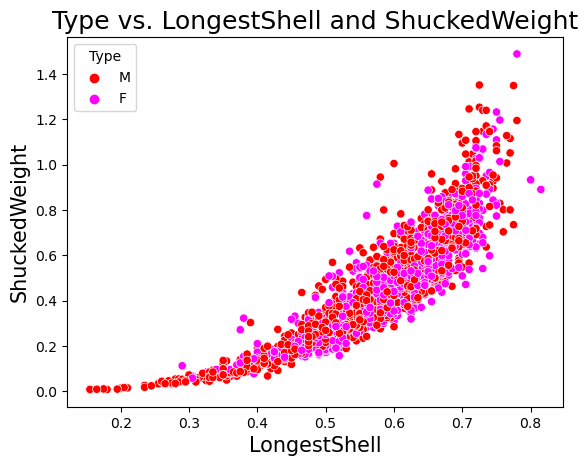

In [65]:
import seaborn as sns

# Create a scatterplot using Seaborn
sns.scatterplot(x="LongestShell", y="ShuckedWeight", hue="Type", data=df, palette=["red", "magenta"])

# Add axis labels and a title
plt.xlabel("LongestShell", fontsize=15)
plt.ylabel("ShuckedWeight", fontsize=15)
plt.title("Type vs. LongestShell and ShuckedWeight", fontsize=18)

# Show the plot
plt.show()


In [66]:
# Store the desired species values in the numpy array y
y = df.iloc[0:100].Type.values

# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'M', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["LongestShell", "ShuckedWeight"]].iloc[:100].values

#  Perceptron model

In [67]:
class Perceptron(object):
    def __init__(self, eta = .1, epochs=2000):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [72]:
# Instantiate one instance of the Perceptron class
clf = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
clf.train(X, y)

In [73]:
# Predict labels on the features in X
y_hat = clf.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True False  True False  True  True  True False  True  True False
 False  True False  True  True  True  True  True  True  True  True False
 False False False  True False  True  True  True  True False  True  True
 False  True  True False  True  True  True False  True False  True  True
 False  True  True  True  True  True  True  True  True False False False
  True False  True  True False  True  True  True  True False  True False
 False  True False False False  True False False False  True False False
  True  True  True False False False False False False  True False False
 False  True  True  True]


A possible conclusion based on this information is that the classifier appears to have moderate accuracy on the given set of features, correctly predicting the label for approximately 58% of the samples.

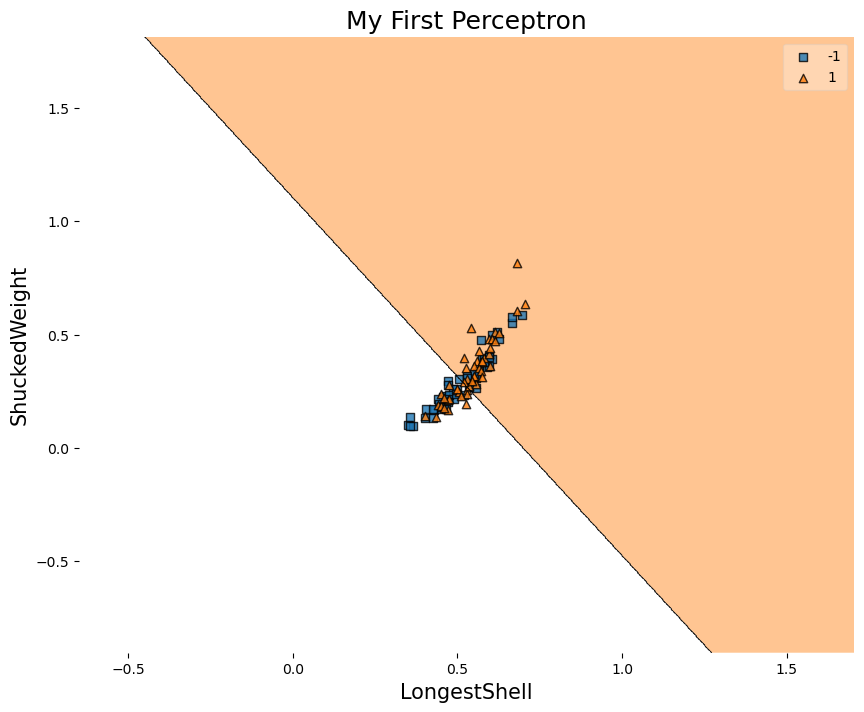

In [51]:
import numpy as np
from mlxtend.plotting import plot_decision_regions
# Convert y to a NumPy array
y = np.array(y)


# Call plot_decision_regions with the updated y parameter
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("LongestShell", fontsize = 15)
plt.ylabel("ShuckedWeight", fontsize = 15)
plt.show()

In [74]:
accuracy1 = sum(y == y_hat) / len(X)
print("Accuracy1:", accuracy)

Accuracy1: 0.4984051036682616


An accuracy score of 0.498 suggests that the model is not performing well and is essentially random guessing. It means that the model is correctly classifying only half of the data points, which is not useful for practical purposes. The model needs to be improved by adjusting the hyperparameters, feature selection, or possibly by using a different algorithm altogether.

# Using different dataset to perform perceptron

In [75]:
#Load fish market dataset
data = pd.read_csv("Fish.csv")
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [76]:
# Create a boolean mask for rows with species "Perch" or "Bream"
mask = (data["Species"] == "Perch") | (data["Species"] == "Bream")

# Select only the rows that meet the condition
df1 = data.loc[mask]

# Print the resulting dataframe
df1.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,91.000000,91.000000,91.000000,91.000000,91.00000,91.000000
mean,472.850549,27.493407,29.898901,32.949451,10.67777,5.007989
std,321.966313,7.394034,7.875920,8.971478,4.39869,1.494158
min,5.900000,7.500000,8.400000,8.800000,2.11200,1.408000
25%,150.000000,21.250000,23.250000,24.750000,6.37950,3.703250
50%,450.000000,27.800000,30.000000,35.000000,11.13660,4.959400
75%,700.000000,32.750000,36.000000,40.550000,14.24470,6.231500
max,1100.000000,41.100000,44.000000,46.600000,18.95700,8.142000


In [77]:
# Store the desired species values in the numpy array y
y = df1.iloc[0:40].Species.values

# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'Bream', -1, 1)

# Store the desired feature measurements in the matrix X
X = df1[["Weight", "Height"]].iloc[:40].values

In [78]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [79]:
# Instantiate one instance of the Perceptron class
clf = Perceptron(epochs = 91)

# Call the train method to train the weights and bias of the given instance
clf.train(X, y)

In [80]:
# Predict labels on the features in X
y_hat = clf.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


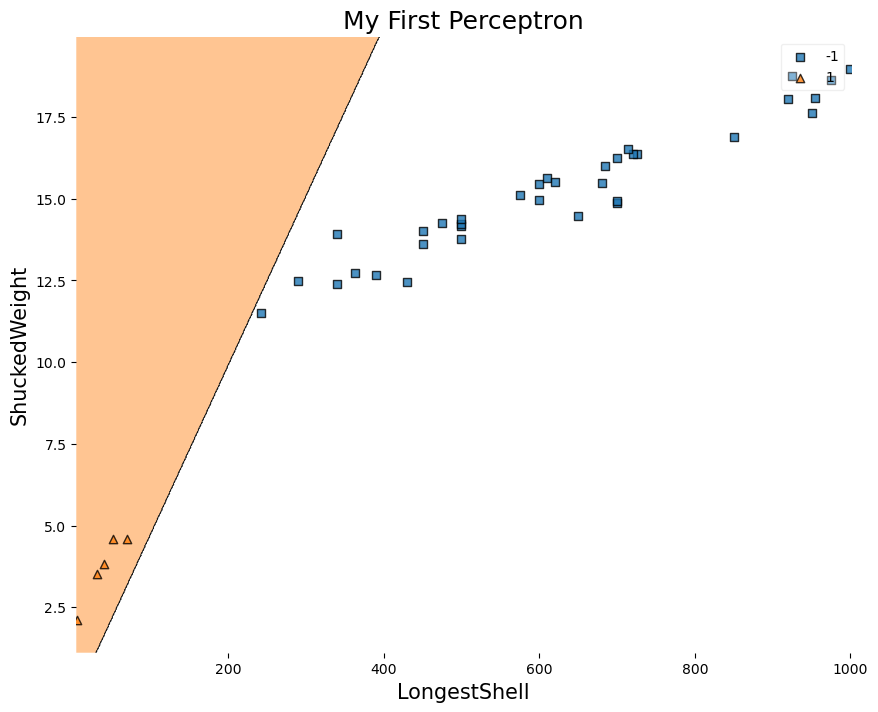

In [83]:
import numpy as np

# Convert y to a NumPy array
y = np.array(y)

# Call plot_decision_regions with the updated y parameter
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("LongestShell", fontsize = 15)
plt.ylabel("ShuckedWeight", fontsize = 15)
plt.show()


The model perfectly seperate the target variable based on features

In [82]:
accuracy = sum(y == y_hat) / len(X)
print("Accuracy:", accuracy)

Accuracy: 1.0


The accuracy is 100% which is hard in the dataset but since its a single neuron with small dataset, it can be possible